# Problem Statement:
Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan.
Company wants to automate the loan eligibility process based on customer
detail provided while filling the details online.
They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
others for checking the eligibility for the home loan.

# Project Objective:
1) This is a standard supervised classification task. A classification problem
where we have to predict whether a customer is eligible for loan or not based on
a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by
entering the username and password and login to the website and then enter
their details to check whether they are eligible for loan or not.

# 1. Import Required Libraries and Read Dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pickle


In [2]:
loan=pd.read_csv('loan_approval_data.csv')

In [3]:
loan.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


# 2. Check the first few samples, shape, info of the data and try to familiarize with dataset


In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
#Univariate Analysis

loan['loan_status'].value_counts(normalize=True)

loan_status
y    0.687296
n    0.312704
Name: proportion, dtype: float64

With the given dataset we can say around 69% are eligible for loan however only 31% who can't

# 3. Check for missing values in the dataset, if present? handle them withappropriate methods and drop redundant features.

In [8]:
#3. Check for missing value

(loan.isnull().sum()/loan.shape[0])*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [9]:
#Missing value treatment
loan['gender'].fillna(loan['gender'].mode()[0], inplace=True)
loan['married'].fillna(loan['married'].mode()[0], inplace=True)
loan['dependents'].fillna(loan['dependents'].mode()[0], inplace=True)
loan['self_employed'].fillna(loan['self_employed'].mode()[0], inplace=True)
loan['loanamount'].fillna(loan['loanamount'].mode()[0], inplace=True)
loan['loan_amount_term'].fillna(loan['loan_amount_term'].mode()[0], inplace=True)
loan['credit_history'].fillna(loan['credit_history'].mode()[0], inplace=True)

In [10]:
(loan.isnull().sum()/loan.shape[0])*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

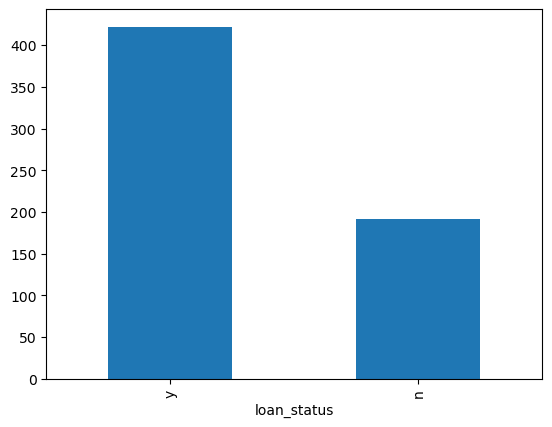

In [11]:
loan['loan_status'].value_counts().plot.bar();

In [12]:
#We can drop loan_id columns since it's just id don't have any significant in further analysis

loan.drop('loan_id',axis=1, inplace=True)

In [13]:
loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [14]:
cat=[]
num=[]
for i in loan.columns:
    if loan[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [15]:
cat.remove('loan_status')

# 4. Visualize the distribution of the target column 'loan_status' with respect tovarious categorical features and write your observations.

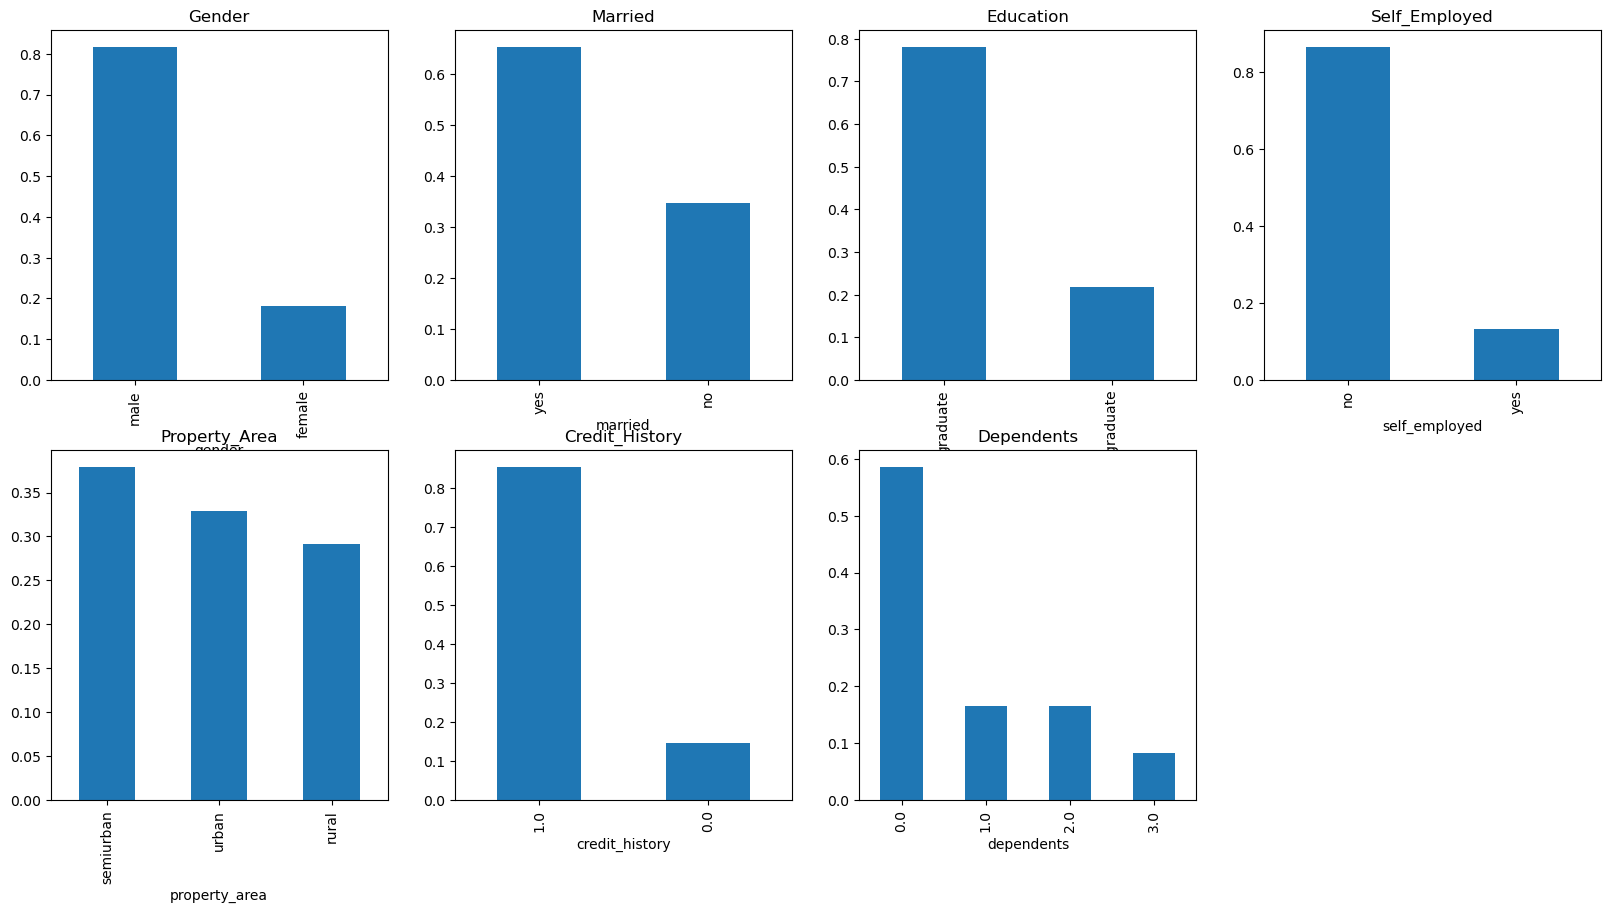

In [16]:
plt.subplot(241)
loan['gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(242)
loan['married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(243)
loan['education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(244)
loan['self_employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(245)
loan['property_area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.subplot(246)
loan['credit_history'].value_counts(normalize=True).plot.bar(title='Credit_History');
plt.subplot(247)
loan['dependents'].value_counts(normalize=True).plot.bar(title='Dependents');

#Observations:
There are 80% in the dataset who are male gets loans when they apply
Similary there are 65% who're married gets loan when they apply
Similarly around 78% who're graduate gets the loan
Around 86% who're not self employed probabaly on job gets loan more than self employed or self employed who normally apply more
loan other than business
Similarly people who all are at urban area look for loans
Around 85% applicants have repaid their debts
Most of the applicants don't have dependents

# 5.Encode the categorical data.

In [17]:
loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [18]:
loan['loan_status'].replace({'y':1,'n':0},inplace=True)

In [19]:
loan['gender'].replace({'male':1,'female':0},inplace=True)

In [20]:
loan['married'].replace({'yes':1,'no':0},inplace=True)

In [21]:
loan['education'].replace({'graduate':1,'not graduate':0},inplace=True)

In [22]:
loan['self_employed'].replace({'yes':1,'no':0},inplace=True)

In [23]:
loan['self_employed'].replace({'yes':1,'no':0},inplace=True)

In [24]:
loan['property_area'].replace({'urban':0,'semiurban':1,'rural':2},inplace=True)

In [25]:
loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,0,1


# 6.Separate the target and independent features and split the data into train and test.

In [26]:
x=loan.drop('loan_status', axis=1)

In [27]:
y=loan['loan_status']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)

# 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [30]:
lr = LogisticRegression(max_iter=1000)
model=lr.fit(x_train,y_train)

In [ ]:
pred

In [31]:
pred_tst = lr.predict(x_test)

In [35]:
accuracy_score(y_test,pred_tst)

0.8216216216216217

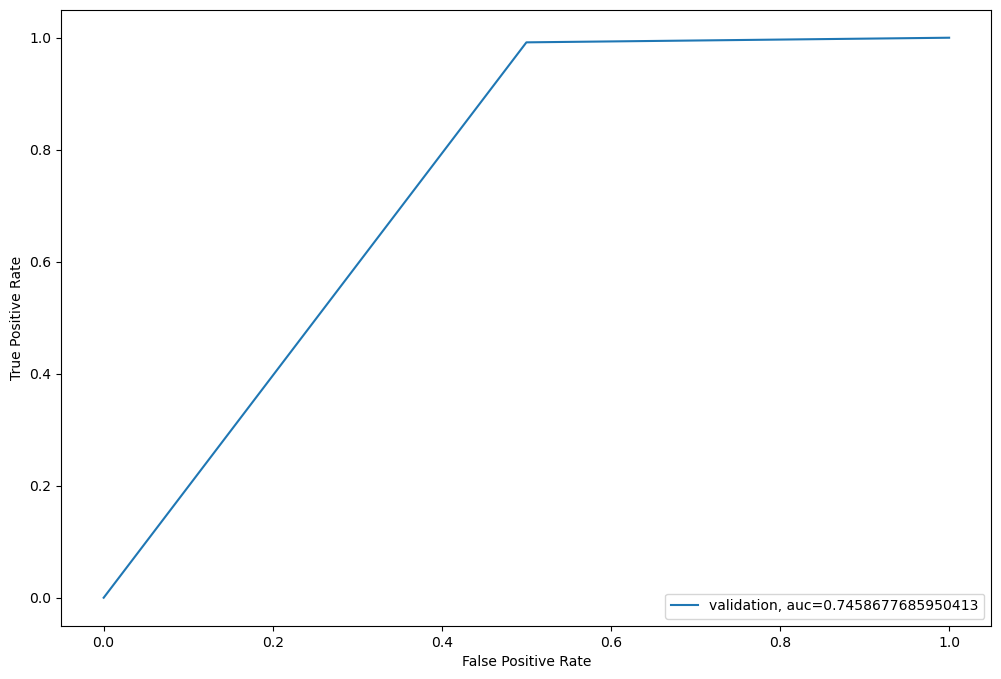

In [34]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_tst)
auc = metrics.roc_auc_score(y_test,pred_tst)
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [33]:
pickle.dump(model,open('model.pkl','wb'))